In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#wczytaj plik Iris.csv
df=pd.read_csv('./datasets/Iris.csv')

In [3]:
#wyświetl cały plik
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#wyświetl podsumowanie ostatniej kolumny
df['Species'].describe()


count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
data = np.asarray(df) #zamiana dataframe na array

X = data[:,1:5] #tworzenie zmiennej, która zawiera dane (pomiary)
y = data[:,5] #tworzenie zmiennej, która zawiera etykiety (Species)
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

SVC używany jest dla większej liczby klas niż 2

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2) #podział na dane treningowe i testowe

model = SVC(kernel = 'linear') #stworzenie klasyfikatora

model.fit(X_train, y_train) #trenowanie klasyfikatora

y_pred = model.predict(X_test) #predykcja na danych testowych

acc = accuracy_score(y_test, y_pred) #policzenie accuracy
print(acc)
#sprawdzić różne  i test size

0.9666666666666667


In [12]:
def classification(X, y, kernel, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= train_size, random_state=42)
    model = SVC(kernel = kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [13]:
train_sizes=[0.2, 0.4, 0.6, 0.8]
kernels = ['linear', 'poly', 'rbf']

In [22]:
for kernel in kernels:
    for train_size in train_sizes:
        print(kernel,', ', train_size, ', ', classification(X, y, kernel, train_size))

linear ,  0.2 ,  0.975
linear ,  0.4 ,  0.9888888888888889
linear ,  0.6 ,  1.0
linear ,  0.8 ,  1.0
poly ,  0.2 ,  0.9833333333333333
poly ,  0.4 ,  0.9888888888888889
poly ,  0.6 ,  1.0
poly ,  0.8 ,  1.0
rbf ,  0.2 ,  0.9333333333333333
rbf ,  0.4 ,  0.9777777777777777
rbf ,  0.6 ,  1.0
rbf ,  0.8 ,  1.0


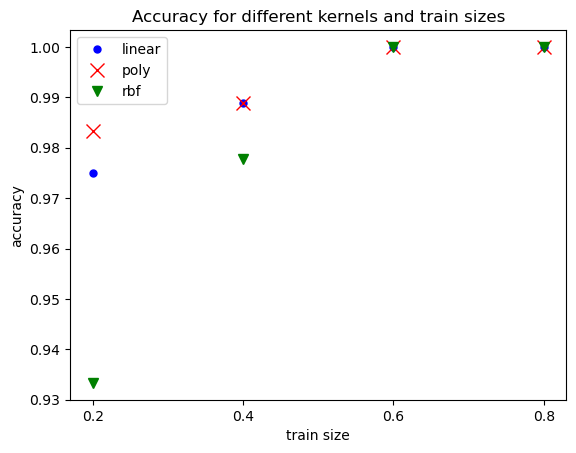

In [40]:
plt.plot(train_sizes, [classification(X, y, 'linear', train_size) for train_size in train_sizes], 'bo', label='linear', markersize=5)
plt.plot(train_sizes, [classification(X, y, 'poly', train_size) for train_size in train_sizes], 'rx', label='poly', markersize=10)
plt.plot(train_sizes, [classification(X, y, 'rbf', train_size) for train_size in train_sizes], 'gv', label='rbf', markersize=7)
plt.xticks(train_sizes)
plt.xlabel('train size')
plt.ylabel('accuracy')
plt.title('Accuracy for different kernels and train sizes')
plt.legend()